<a href="https://colab.research.google.com/github/Pravallika-Myneni/world_data_league_2022/blob/main/Weekly_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Waste Production for its Reduction**

## Context
According to the World Bank, in 2016 cities generated 2.01 billion tons of solid waste. Per person, this is around 0.74 kg/day! With the rapid growth of cities, this number is only expected to increase. As cities are growing, it is urgent that optimization processes for waste processing and more targeted public education on waste management and separation. Finally, it is also important to note that waste collection also has an impact on air pollution.

## Goal & Outcome
The goal of this challenge is to help identify trends in waste production and help to create insights into how to reduce waste and optimize its collection. The expected outcome to this challenge is to identify waste trends and to produce an explainable model for predicting future waste production. Finally, don’t forget to propose the application (product) for the model and study its impact.

## Data
Austin Resource Recovery daily report providing waste collection information based on the following categories:


*   Report Date: The date collections information was recorded.
*   Load Type: The specific type of load that is being collected on that day.
*   Load Time: Date & Time of Loading
*   Load Weight: The weight (in pounds) collected for each service on the day it was delivered to a diversion facility
*   Drop off Site: The location where each type of waste is delivered for disposal, recycling or reuse: TDS Landfill indicates the Texas Disposal System landfill located at 12200 Carl Rd, Creedmoor, TX 78610; Balcones Recycling is a recycling facility located at 9301 Johnny Morris Road Austin, TX 78724; MRF is a Materials Recycling Facility (such as Texas Disposal Systems or Balcones Recycling); Hornsby Bend is located at 2210 FM 973, Austin, TX 78725 and accepts food scraps, yard trimmings, food-soiled paper and other materials collected by ARR, and combined with other waste to produce nutrient-rich dillo dirt, used for landscaping.
*   Route Type: The general category of collection service provided by Austin Resource Recovery
*   Route Number: Austin Resource Recovery route that the truck that collected this load was following. Each route has abbreviated letters indicating the service type (e.g. Bulk = "BU") and a number indicating the specific route.

### Development

In [ ]:
#Imports
import pandas as pd
import seaborn as sns
import pandas as pd, datetime as dt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/world_data_league_2022/main/stage_one/data/waste_data.csv')
df_= df.copy()

In [ ]:
df.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,12/08/2020,BULK,12/08/2020 03:02:00 PM,5220.0,TDS LANDFILL,BULK,BU13,899097
1,12/08/2020,RECYCLING - SINGLE STREAM,12/08/2020 10:00:00 AM,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,12/03/2020,RECYCLING - SINGLE STREAM,12/03/2020 10:34:00 AM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,12/07/2020,SWEEPING,12/07/2020 10:15:00 AM,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,12/07/2020,RECYCLING - SINGLE STREAM,12/07/2020 04:00:00 PM,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740873 entries, 0 to 740872
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Report Date   740873 non-null  object 
 1   Load Type     740873 non-null  object 
 2   Load Time     740873 non-null  object 
 3   Load Weight   668538 non-null  float64
 4   Dropoff Site  740873 non-null  object 
 5   Route Type    740873 non-null  object 
 6   Route Number  740873 non-null  object 
 7   Load ID       740873 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 45.2+ MB


In [ ]:
df.isnull().sum()/df.shape[0]

Report Date     0.000000
Load Type       0.000000
Load Time       0.000000
Load Weight     0.097635
Dropoff Site    0.000000
Route Type      0.000000
Route Number    0.000000
Load ID         0.000000
dtype: float64

In [ ]:
pd.to_datetime(df['Load Time']).dt.year.unique()

array([2020, 2010, 2012, 2017, 2008, 2016, 2009, 2018, 2004, 2019, 2014,
       2015, 2011, 2006, 2013, 2007, 2005, 2001, 2000, 2030, 2021])

In [ ]:
df_1 = df.copy()
df = df.dropna()
df.shape

(668538, 8)

**6% missing data in the given values**
Lets fill the missing values based on average of load type

In [ ]:
df["Load Type"].value_counts()

GARBAGE COLLECTIONS            258395
RECYCLING - SINGLE STREAM      147612
YARD TRIMMING                   69554
BULK                            40117
BRUSH                           39141
RECYCLING - PAPER               32155
RECYCLING - COMINGLE            31116
ORGANICS                        17705
SWEEPING                        16522
DEAD ANIMAL                      6856
TIRES                            3205
MIXED LITTER                     2110
LITTER                           1539
MULCH                            1344
RECYCLED METAL                   1049
BAGGED LITTER                      43
RECYCLING - PLASTIC BAGS           40
YARD TRIMMING - X-MAS TREES        16
MATTRESS                            9
CONTAMINATED RECYCLING              8
CONTAMINATED YARD TRIMMINGS         1
CONTAMINATED ORGANICS               1
Name: Load Type, dtype: int64

In [ ]:
df["Load Time"] = pd.to_datetime(df["Load Time"])

In [ ]:
df.set_index('Load Time').groupby(pd.Grouper(freq='Y')).mean()

,Load Weight,Load ID
Load Time,,
2000-12-31,2940.000000,163262.000000
2001-12-31,7830.000000,534165.500000
2002-12-31,NaN,NaN
2003-12-31,NaN,NaN
2004-12-31,10181.449011,106949.560931
2005-12-31,9744.876242,136314.313495
2006-12-31,9522.289847,184115.513944
2007-12-31,9930.658429,233758.767469
2008-12-31,9917.235689,284481.993461


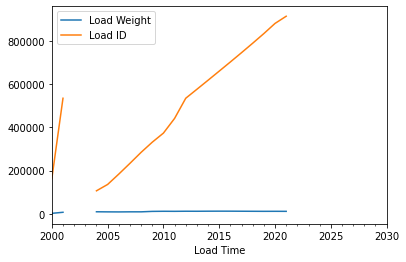

In [ ]:
df.set_index('Load Time').groupby(pd.Grouper(freq='Y')).mean().plot()

In [ ]:
weekly_loadweight=df.groupby('Load Weight').resample('W-Mon', on='Load Time').mean().sort_values(by='Load Time')

In [ ]:
weekly_loadweight

Load Weight   Load ID
Load Weight Load Time                        
2940.0      2000-01-31       2940.0  163262.0
            2000-02-07          NaN       NaN
            2000-02-14          NaN       NaN
            2000-02-21          NaN       NaN
            2000-02-28          NaN       NaN
...                             ...       ...
320.0       2030-10-28          NaN       NaN
            2030-11-04          NaN       NaN
            2030-11-11          NaN       NaN
            2030-11-18          NaN       NaN
            2030-11-25        320.0  897529.0

[1860226 rows x 2 columns]

In [ ]:
weekly_loadweight.dropna()

,,Load Weight,Load ID
Load Weight,Load Time,,
2940.0,2000-01-31,2940.0,163262.0
4740.0,2001-03-19,4740.0,522334.0
4240.0,2001-03-19,4240.0,522335.0
14080.0,2001-10-22,14080.0,545997.0
8260.0,2001-10-22,8260.0,545996.0
...,...,...,...
10080.0,2021-07-12,10080.0,928901.0
1340.0,2021-12-13,1340.0,927983.0
6940.0,2021-12-27,6940.0,906125.0


In [ ]:
sorted(df['Load Time'].dt.date.unique())

In [ ]:
df['WeekDate'] = df.apply(lambda row: row['Load Time'] - dt.timedelta(days=row['Load Time'].weekday()), axis=1)

perweek = df['WeekDate'].groupby(df['WeekDate']).count()

In [ ]:
sorted(df['WeekDate'].dt.date.unique())

[datetime.date(2000, 1, 24),
 datetime.date(2001, 3, 12),
 datetime.date(2001, 10, 15),
 datetime.date(2004, 1, 5),
 datetime.date(2004, 2, 23),
 datetime.date(2004, 8, 23),
 datetime.date(2004, 8, 30),
 datetime.date(2004, 9, 27),
 datetime.date(2004, 10, 4),
 datetime.date(2004, 10, 11),
 datetime.date(2004, 10, 18),
 datetime.date(2004, 10, 25),
 datetime.date(2004, 11, 1),
 datetime.date(2004, 11, 8),
 datetime.date(2004, 11, 15),
 datetime.date(2004, 11, 22),
 datetime.date(2004, 11, 29),
 datetime.date(2004, 12, 6),
 datetime.date(2004, 12, 13),
 datetime.date(2004, 12, 20),
 datetime.date(2004, 12, 27),
 datetime.date(2005, 1, 3),
 datetime.date(2005, 1, 10),
 datetime.date(2005, 1, 17),
 datetime.date(2005, 1, 24),
 datetime.date(2005, 1, 31),
 datetime.date(2005, 2, 7),
 datetime.date(2005, 2, 14),
 datetime.date(2005, 2, 21),
 datetime.date(2005, 2, 28),
 datetime.date(2005, 3, 7),
 datetime.date(2005, 3, 14),
 datetime.date(2005, 3, 21),
 datetime.date(2005, 3, 28),
 datetim

In [ ]:
perweek.value_counts()

1      162150
2       82817
3       41862
4       18942
5        8318
        ...  
139         1
138         1
71          1
226         1
58          1
Name: WeekDate, Length: 118, dtype: int64

**Drop**

In [ ]:
df['WeekDate'].dt.year.unique()

array([2020, 2010, 2012, 2017, 2008, 2009, 2018, 2004, 2019, 2014, 2011,
       2006, 2016, 2015, 2013, 2005, 2007, 2001, 2000, 2030, 2021])

In [ ]:
df_2 = df.copy()
df = df.drop(columns = ['Report Date', 'Load Time', 'Load ID'])

In [ ]:
df_complete = df.copy()
df_2019_21 = df[(df["WeekDate"].dt.year >=2019) &  (df["WeekDate"].dt.year <= 2021)]
df_2019_21

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,WeekDate
0,BULK,5220.0,TDS LANDFILL,BULK,BU13,2020-12-07 15:02:00
1,RECYCLING - SINGLE STREAM,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,2020-12-07 10:00:00
2,RECYCLING - SINGLE STREAM,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,2020-11-30 10:34:00
3,SWEEPING,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,2020-12-07 10:15:00
4,RECYCLING - SINGLE STREAM,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,2020-12-07 16:00:00
...,...,...,...,...,...,...
740867,RECYCLING - COMINGLE,2580.0,MRF,RECYCLING,RM01,2021-07-05 07:00:38
740868,RECYCLING - PAPER,1080.0,MRF,RECYCLING,RW05,2021-07-05 07:00:39
740869,BULK,9360.0,TDS LANDFILL,STORM,HAFLDBU15,2021-07-05 07:05:29
740871,RECYCLING - COMINGLE,3960.0,MRF,RECYCLING,RW04,2021-07-05 07:00:39


In [ ]:
df_2019_21.sort_values(by='WeekDate')

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,WeekDate
81312,RECYCLING - SINGLE STREAM,100.0,TDS - MRF,KAB,KAB04,2019-01-07 00:00:00
145620,BULK,7640.0,TDS LANDFILL,BULK,BU19,2019-01-07 00:00:00
561978,YARD TRIMMING,14320.0,HORNSBY BEND,YARD TRIMMINGS,YW04,2019-01-07 00:00:00
105244,MIXED LITTER,4460.0,TDS LANDFILL,KAB,KAB03,2019-01-07 00:00:00
8928,LITTER,5180.0,ONION CREEK,KAB,KAB07,2019-01-07 00:00:00
...,...,...,...,...,...,...
740374,GARBAGE COLLECTIONS,9140.0,TDS LANDFILL,GARBAGE COLLECTION,PAW56,2021-07-05 18:40:00
740463,GARBAGE COLLECTIONS,23960.0,TDS LANDFILL,GARBAGE COLLECTION,PAW54,2021-07-05 18:41:00
740445,GARBAGE COLLECTIONS,20480.0,TDS LANDFILL,GARBAGE COLLECTION,PAW50,2021-07-05 18:56:00
739696,ORGANICS,1340.0,ORGANICS BY GOSH,YARD TRIMMINGS-ORGANICS,OBT99,2021-12-06 00:00:00


## Grouping by week 
- For Load Weight we can use sum()
- for rest we can make a list

In [ ]:
df_by_week = df.groupby('WeekDate').agg(list)
df_by_week['Load Weight'] = df_by_week['Load Weight'].apply(lambda x: np.nansum(x))

## Next Steps
- focus on particular types of route types/load types
- using only 2021 data
- but if we are focusing only on 2021 data, we might have only 52 weeks

#2021 Data -- Post - COVID

In [ ]:
df2021 = df[pd.DatetimeIndex(df["WeekDate"]).year == 2021] 
df2021

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,WeekDate
713884,GARBAGE COLLECTIONS,3640.0,TDS LANDFILL,GARBAGE COLLECTION,PAM70,2021-01-04 19:15:00
713887,BRUSH,3700.0,HORNSBY BEND,BRUSH,BR21,2021-01-04 15:13:00
713889,YARD TRIMMING,11060.0,HORNSBY BEND,YARD TRIMMINGS,YM04,2021-01-04 13:12:00
713892,YARD TRIMMING,15980.0,HORNSBY BEND,YARD TRIMMINGS,YM03,2021-01-04 16:55:00
713906,YARD TRIMMING,18080.0,HORNSBY BEND,YARD TRIMMINGS,YM02,2021-01-04 17:39:00
...,...,...,...,...,...,...
740867,RECYCLING - COMINGLE,2580.0,MRF,RECYCLING,RM01,2021-07-05 07:00:38
740868,RECYCLING - PAPER,1080.0,MRF,RECYCLING,RW05,2021-07-05 07:00:39
740869,BULK,9360.0,TDS LANDFILL,STORM,HAFLDBU15,2021-07-05 07:05:29
740871,RECYCLING - COMINGLE,3960.0,MRF,RECYCLING,RW04,2021-07-05 07:00:39


In [ ]:
df2021.isnull().sum()/df2021.shape[0]

Load Type       0.0
Load Weight     0.0
Dropoff Site    0.0
Route Type      0.0
Route Number    0.0
WeekDate        0.0
dtype: float64

In [ ]:
df2021['Dates'] = pd.to_datetime(df2021["WeekDate"]).dt.date
df2021['Time'] = pd.to_datetime(df2021['WeekDate']).dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2021 = df2021.drop('WeekDate',axis=1)

In [ ]:
df2021

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Dates,Time
713884,GARBAGE COLLECTIONS,3640.0,TDS LANDFILL,GARBAGE COLLECTION,PAM70,2021-01-04,19:15:00
713887,BRUSH,3700.0,HORNSBY BEND,BRUSH,BR21,2021-01-04,15:13:00
713889,YARD TRIMMING,11060.0,HORNSBY BEND,YARD TRIMMINGS,YM04,2021-01-04,13:12:00
713892,YARD TRIMMING,15980.0,HORNSBY BEND,YARD TRIMMINGS,YM03,2021-01-04,16:55:00
713906,YARD TRIMMING,18080.0,HORNSBY BEND,YARD TRIMMINGS,YM02,2021-01-04,17:39:00
...,...,...,...,...,...,...,...
740867,RECYCLING - COMINGLE,2580.0,MRF,RECYCLING,RM01,2021-07-05,07:00:38
740868,RECYCLING - PAPER,1080.0,MRF,RECYCLING,RW05,2021-07-05,07:00:39
740869,BULK,9360.0,TDS LANDFILL,STORM,HAFLDBU15,2021-07-05,07:05:29
740871,RECYCLING - COMINGLE,3960.0,MRF,RECYCLING,RW04,2021-07-05,07:00:39


In [ ]:
df2021.isnull().sum()/df.shape[0]

Load Type       0.0
Load Weight     0.0
Dropoff Site    0.0
Route Type      0.0
Route Number    0.0
Dates           0.0
Time            0.0
dtype: float64

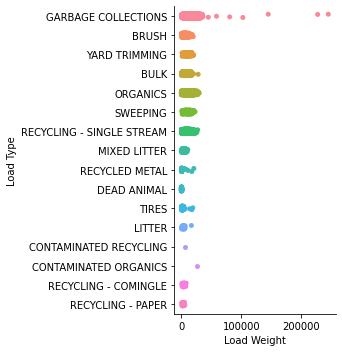

In [ ]:
sns.catplot(x="Load Weight", y="Load Type", data=df2021)

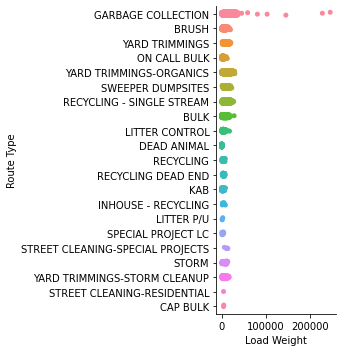

In [ ]:
sns.catplot(x="Load Weight", y="Route Type", data=df2021)

In [ ]:
df2021['Dates'].nunique()

29

In [ ]:
df2021['Dates'].unique()

array([datetime.date(2021, 1, 4), datetime.date(2021, 1, 11),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 25),
       datetime.date(2021, 12, 20), datetime.date(2021, 2, 1),
       datetime.date(2021, 2, 8), datetime.date(2021, 2, 15),
       datetime.date(2021, 2, 22), datetime.date(2021, 3, 1),
       datetime.date(2021, 3, 22), datetime.date(2021, 3, 8),
       datetime.date(2021, 3, 15), datetime.date(2021, 3, 29),
       datetime.date(2021, 4, 5), datetime.date(2021, 4, 12),
       datetime.date(2021, 4, 19), datetime.date(2021, 4, 26),
       datetime.date(2021, 5, 3), datetime.date(2021, 5, 10),
       datetime.date(2021, 5, 17), datetime.date(2021, 5, 24),
       datetime.date(2021, 5, 31), datetime.date(2021, 6, 7),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 14),
       datetime.date(2021, 6, 28), datetime.date(2021, 12, 6),
       datetime.date(2021, 7, 5)], dtype=object)

In [ ]:
## what are the missing weeks?
all_dates_2021 = pd.date_range(
  start="2021-01-01", end="2021-12-31", freq = "W-MON")
all_dates_2021.difference(df2021['Dates'])


DatetimeIndex(['2021-07-12', '2021-07-19', '2021-07-26', '2021-08-02',
               '2021-08-09', '2021-08-16', '2021-08-23', '2021-08-30',
               '2021-09-06', '2021-09-13', '2021-09-20', '2021-09-27',
               '2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25',
               '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-12-13', '2021-12-27'],
              dtype='datetime64[ns]', freq=None)

**Why are these weeks data missing? any particular reason**

- What can be done - check for any holidays in this week? 
- any pattern? 
- are the same weeks missing in other years?


## Creating three Data Frames - Precovid, Covid and Post Covid

In [ ]:
df_complete_1 = df.copy()
df_complete_1['Dates'] = pd.to_datetime(df_complete_1["WeekDate"]).dt.date
df_complete_1['Time'] = pd.to_datetime(df_complete_1['WeekDate']).dt.time
df_complete_1['year'] = pd.to_datetime(df_complete_1['WeekDate']).dt.year
df_complete_1 = df_complete_1[(df_complete_1['year']>2004) & (df_complete_1['year']<2022) ]
df_complete_1 = df_complete_1.drop(columns = ['WeekDate', 'year'])


##Adding holiday data

In [ ]:
from datetime import date
import holidays

us_holidays = holidays.US()

In [ ]:
df_holiday = df_complete_1.copy()

df_holiday['holiday'] = df_holiday['Dates'].apply(lambda x: 1 if x in us_holidays else 0 )
df_holiday['holiday'].unique()

array([0, 1])

In [ ]:
df_weekly_holiday = df_complete_1.copy()

In [ ]:
def number_of_holidays_in_week(date):
  res = 0
  end = date
  start = date - dt.timedelta(days=7)
  date_range = pd.date_range(start, end)
  for day in date_range:
    if day in us_holidays:
      res+=1
  return res

In [ ]:
df_weekly_holiday['holidays'] = df_weekly_holiday['Dates'].apply(lambda x: number_of_holidays_in_week(x))

In [ ]:
df_weekly_holiday['holidays'].unique()

array([0, 1, 2, 3])

### Grouping BY Week

In [ ]:
df_by_week = df_complete_1.copy()
df_by_week = df_by_week.groupby('Dates').agg(list)
df_by_week['Load Weight'] = df_by_week['Load Weight'].apply(lambda x: np.nansum(x))
#df_by_week['holidays'] = df_by_week['holidays'].apply(lambda x: x[0])
df_by_week

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time
Dates,,,,,,
2005-01-03,"[RECYCLING - PAPER, GARBAGE COLLECTIONS, RECYC...",8588110.0,"[MRF, TDS LANDFILL, MRF, TDS LANDFILL, TDS LAN...","[INHOUSE - RECYCLING, GARBAGE COLLECTION, RECY...","[IRM1, PF80, RH25, PAF71, PM10, PAW60, PT31, R...","[13:40:00, 12:12:00, 14:21:00, 10:37:00, 13:13..."
2005-01-10,"[RECYCLING - COMINGLE, SWEEPING, GARBAGE COLLE...",8589808.0,"[MRF, STEINER LANDFILL, TDS LANDFILL, TDS LAND...","[RECYCLING, SWEEPER DUMPSITES, GARBAGE COLLECT...","[RW20, DSS06, PAM77, BU31, PAT75, RT11, RM04, ...","[12:27:00, 08:04:00, 12:30:00, 10:06:00, 16:04..."
2005-01-17,"[YARD TRIMMING, YARD TRIMMING, GARBAGE COLLECT...",7006387.0,"[HORNSBY BEND, HORNSBY BEND, TDS LANDFILL, STE...","[YARD TRIMMINGS, YARD TRIMMINGS, GARBAGE COLLE...","[YM03, YT06, PAF73, BU13, PM32, RF10, YF03, DF...","[12:00:00, 12:36:00, 15:46:00, 10:39:00, 12:19..."
2005-01-24,"[GARBAGE COLLECTIONS, YARD TRIMMING, GARBAGE C...",7116256.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, TDS...","[GARBAGE COLLECTION, YARD TRIMMINGS, GARBAGE C...","[PAH02, YT06, PAF79, PAT60, BR18, PAW64, BR28,...","[15:55:00, 16:15:00, 13:17:00, 10:48:00, 11:26..."
2005-01-31,"[GARBAGE COLLECTIONS, BRUSH, GARBAGE COLLECTIO...",6627016.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, STE...","[GARBAGE COLLECTION, BRUSH, GARBAGE COLLECTION...","[PAM74, BR09, PAT74, BU10, RW15, RW02, YW08, R...","[13:51:00, 10:35:00, 10:31:00, 12:54:00, 13:25..."
...,...,...,...,...,...,...
2021-06-21,"[BULK, BRUSH, GARBAGE COLLECTIONS, ORGANICS, R...",10442680.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, ORG...","[BULK, BRUSH, GARBAGE COLLECTION, YARD TRIMMIN...","[BU16, BR06, PF41, OM30, RMAU52, RMAU51, PAM72...","[13:35:00, 15:16:00, 12:50:00, 17:30:00, 11:14..."
2021-06-28,"[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...",10174590.0,"[TDS - MRF, TDS LANDFILL, TDS LANDFILL, TDS LA...","[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...","[RMBU52, PAM74, PAM75, PAM74, PAM73, OCPBU23, ...","[10:00:00, 18:00:00, 18:00:00, 13:30:00, 13:45..."
2021-07-05,"[GARBAGE COLLECTIONS, GARBAGE COLLECTIONS, GAR...",7595100.0,"[TDS LANDFILL, TDS LANDFILL, TDS LANDFILL, TDS...","[GARBAGE COLLECTION, GARBAGE COLLECTION, GARBA...","[PAF02, PAM06, PAM79, VB-01, OM17, OM31, PAM02...","[12:36:00, 03:57:00, 14:00:00, 13:09:00, 14:26..."


In [ ]:
df_by_week

,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time
Dates,,,,,,
2005-01-03,"[RECYCLING - PAPER, GARBAGE COLLECTIONS, RECYC...",8588110.0,"[MRF, TDS LANDFILL, MRF, TDS LANDFILL, TDS LAN...","[INHOUSE - RECYCLING, GARBAGE COLLECTION, RECY...","[IRM1, PF80, RH25, PAF71, PM10, PAW60, PT31, R...","[13:40:00, 12:12:00, 14:21:00, 10:37:00, 13:13..."
2005-01-10,"[RECYCLING - COMINGLE, SWEEPING, GARBAGE COLLE...",8589808.0,"[MRF, STEINER LANDFILL, TDS LANDFILL, TDS LAND...","[RECYCLING, SWEEPER DUMPSITES, GARBAGE COLLECT...","[RW20, DSS06, PAM77, BU31, PAT75, RT11, RM04, ...","[12:27:00, 08:04:00, 12:30:00, 10:06:00, 16:04..."
2005-01-17,"[YARD TRIMMING, YARD TRIMMING, GARBAGE COLLECT...",7006387.0,"[HORNSBY BEND, HORNSBY BEND, TDS LANDFILL, STE...","[YARD TRIMMINGS, YARD TRIMMINGS, GARBAGE COLLE...","[YM03, YT06, PAF73, BU13, PM32, RF10, YF03, DF...","[12:00:00, 12:36:00, 15:46:00, 10:39:00, 12:19..."
2005-01-24,"[GARBAGE COLLECTIONS, YARD TRIMMING, GARBAGE C...",7116256.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, TDS...","[GARBAGE COLLECTION, YARD TRIMMINGS, GARBAGE C...","[PAH02, YT06, PAF79, PAT60, BR18, PAW64, BR28,...","[15:55:00, 16:15:00, 13:17:00, 10:48:00, 11:26..."
2005-01-31,"[GARBAGE COLLECTIONS, BRUSH, GARBAGE COLLECTIO...",6627016.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, STE...","[GARBAGE COLLECTION, BRUSH, GARBAGE COLLECTION...","[PAM74, BR09, PAT74, BU10, RW15, RW02, YW08, R...","[13:51:00, 10:35:00, 10:31:00, 12:54:00, 13:25..."
...,...,...,...,...,...,...
2021-06-21,"[BULK, BRUSH, GARBAGE COLLECTIONS, ORGANICS, R...",10442680.0,"[TDS LANDFILL, HORNSBY BEND, TDS LANDFILL, ORG...","[BULK, BRUSH, GARBAGE COLLECTION, YARD TRIMMIN...","[BU16, BR06, PF41, OM30, RMAU52, RMAU51, PAM72...","[13:35:00, 15:16:00, 12:50:00, 17:30:00, 11:14..."
2021-06-28,"[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...",10174590.0,"[TDS - MRF, TDS LANDFILL, TDS LANDFILL, TDS LA...","[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...","[RMBU52, PAM74, PAM75, PAM74, PAM73, OCPBU23, ...","[10:00:00, 18:00:00, 18:00:00, 13:30:00, 13:45..."
2021-07-05,"[GARBAGE COLLECTIONS, GARBAGE COLLECTIONS, GAR...",7595100.0,"[TDS LANDFILL, TDS LANDFILL, TDS LANDFILL, TDS...","[GARBAGE COLLECTION, GARBAGE COLLECTION, GARBA...","[PAF02, PAM06, PAM79, VB-01, OM17, OM31, PAM02...","[12:36:00, 03:57:00, 14:00:00, 13:09:00, 14:26..."


In [ ]:
df_years = df_by_week.reset_index()
df_years['Dates'] = pd.to_datetime(df_years['Dates'])
df_years['year'] = df_years['Dates'].dt.year

In [ ]:
df_years.year.value_counts()

2007    53
2018    53
2012    53
2005    52
2015    52
2020    52
2019    52
2017    52
2016    52
2013    52
2014    52
2006    52
2011    52
2010    52
2009    52
2008    52
2021    29
Name: year, dtype: int64

### Pre-covid Data

- 2005 to 2019

In [ ]:
df_pre_covid = df_years.copy()
df_pre_covid = df_pre_covid[ ( df_pre_covid['year'] >= 2005) & ( df_pre_covid['year'] <= 2019) ]
df_pre_covid.sample(4)

,Dates,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time,year
412,2012-11-26,"[GARBAGE COLLECTIONS, GARBAGE COLLECTIONS, REC...",9028827.0,"[TDS LANDFILL, TDS LANDFILL, TDS - MRF, TDS LA...","[GARBAGE COLLECTION, GARBAGE COLLECTION, RECYC...","[PF30, PAF01, RMBU21, BU20, PAW86, PAH10, BR15...","[14:30:00, 13:30:00, 14:16:00, 11:37:00, 00:00...",2012
355,2011-10-24,"[RECYCLING - SINGLE STREAM, BRUSH, BULK, BRUSH...",8062807.0,"[TDS - MRF, HORNSBY BEND, TDS LANDFILL, HORNSB...","[RECYCLING - SINGLE STREAM, BRUSH, BULK, BRUSH...","[RHAU14, BR08, BU09, BR08, PAM80, KAB07, RTAU1...","[15:18:00, 12:02:00, 13:22:00, 09:30:00, 13:23...",2011
20,2005-05-23,"[SWEEPING, RECYCLING - COMINGLE, RECYCLING - C...",7476438.0,"[STEINER LANDFILL, MRF, MRF, HORNSBY BEND, TDS...","[SWEEPER DUMPSITES, RECYCLING, RECYCLING, YARD...","[DSN01, RM25, RM06, YF02, PH10, PAH63, BR23, R...","[12:33:00, 16:01:00, 13:24:00, 14:30:00, 13:00...",2005
30,2005-08-01,"[YARD TRIMMING, RECYCLING - COMINGLE, BULK, RE...",7622697.0,"[HORNSBY BEND, MRF, TDS LANDFILL, MRF, MRF, HO...","[YARD TRIMMINGS, RECYCLING, BULK, RECYCLING, R...","[YH06, RM32, BU31, RH05, RW25, YM02, PF12, RT2...","[13:13:00, 13:35:00, 11:21:00, 14:01:00, 12:32...",2005


In [ ]:
all_dates_pre = pd.date_range(
  start="2005-01-01", end="2019-12-31", freq = "W-MON")
all_dates_pre.difference(df_pre_covid['Dates'])

DatetimeIndex([], dtype='datetime64[ns]', freq='W-MON')

### Covid Data

In [ ]:
df_covid = df_years.copy()
df_covid = df_covid[( df_covid['year'] == 2020)]
df_covid.sample(4)

,Dates,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time,year
788,2020-02-10,"[SWEEPING, GARBAGE COLLECTIONS, GARBAGE COLLEC...",8701132.0,"[TDS LANDFILL, TDS LANDFILL, TDS LANDFILL, ORG...","[SWEEPER DUMPSITES, GARBAGE COLLECTION, GARBAG...","[DSS04, PAF10, PAW53, OH-23, DA02, RMBS34, OF2...","[12:57:00, 09:06:00, 09:20:00, 13:29:00, 14:18...",2020
819,2020-09-14,"[ORGANICS, GARBAGE COLLECTIONS, ORGANICS, RECY...",9726130.0,"[ORGANICS BY GOSH, TDS LANDFILL, ORGANICS BY G...","[YARD TRIMMINGS-ORGANICS, GARBAGE COLLECTION, ...","[OT11, PH39, OW6, RTAU12, OT23, BR1000, PAM69,...","[14:21:00, 13:15:00, 14:41:00, 10:46:00, 13:06...",2020
815,2020-08-17,"[GARBAGE COLLECTIONS, GARBAGE COLLECTIONS, REC...",8734600.0,"[TDS LANDFILL, TDS LANDFILL, BALCONES RECYCLIN...","[GARBAGE COLLECTION, GARBAGE COLLECTION, RECYC...","[PAM60, PAH03, RWAU52, RFAU12, PAF52, RMBU51, ...","[10:34:00, 11:14:00, 10:00:00, 14:38:00, 15:03...",2020
786,2020-01-27,"[GARBAGE COLLECTIONS, RECYCLING - SINGLE STREA...",9446000.0,"[TDS LANDFILL, TDS - MRF, BALCONES RECYCLING, ...","[GARBAGE COLLECTION, RECYCLING - SINGLE STREAM...","[PM32, RMBU23, RHBU11, PM41, RMBS34, PF32, PAH...","[13:15:00, 16:33:00, 15:43:00, 12:53:00, 13:10...",2020


In [ ]:
all_dates_covid = pd.date_range(
  start="2020-01-01", end="2020-12-31", freq = "W-MON")
all_dates_covid.difference(df_covid['Dates'])

DatetimeIndex([], dtype='datetime64[ns]', freq='W-MON')

### Post Covid Data

In [ ]:
df_post_covid = df_years.copy()
df_post_covid = df_post_covid[( df_post_covid['year'] == 2021)]
df_post_covid.sample(4)

,Dates,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time,year
860,2021-06-28,"[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...",1.017459e+07,"[TDS - MRF, TDS LANDFILL, TDS LANDFILL, TDS LA...","[RECYCLING - SINGLE STREAM, GARBAGE COLLECTION...","[RMBU52, PAM74, PAM75, PAM74, PAM73, OCPBU23, ...","[10:00:00, 18:00:00, 18:00:00, 13:30:00, 13:45...",2021
857,2021-06-07,"[BULK, RECYCLED METAL, BRUSH, BRUSH, ORGANICS,...",1.203228e+07,"[TDS LANDFILL, AUSTIN IRON AND METAL, HORNSBY ...","[ON CALL BULK, ON CALL BULK, BRUSH, BRUSH, DEA...","[OCPBU09, OCPBU23, BR24, BR24, DA02, RMAU52, R...","[15:47:00, 11:09:00, 16:15:00, 16:07:00, 14:30...",2021
858,2021-06-14,"[BRUSH, GARBAGE COLLECTIONS, ORGANICS, GARBAGE...",1.095334e+07,"[HORNSBY BEND, TDS LANDFILL, ORGANICS BY GOSH,...","[BRUSH, GARBAGE COLLECTION, YARD TRIMMINGS-ORG...","[BR14, PAM01, OT5, PAM01, OCPBU23, BR14, BR14,...","[15:23:00, 04:11:00, 08:44:00, 11:17:00, 11:36...",2021
848,2021-04-05,"[BRUSH, BRUSH, GARBAGE COLLECTIONS, MIXED LITT...",1.096761e+07,"[HORNSBY BEND, HORNSBY BEND, TDS LANDFILL, TDS...","[BRUSH, BRUSH, GARBAGE COLLECTION, LITTER CONT...","[BR03, BR03, PW41, VB-01, OCPBU09, BR03, PAF60...","[16:14:00, 09:44:00, 11:55:00, 07:23:00, 15:07...",2021


In [ ]:
all_dates_post = pd.date_range(
  start="2021-01-01", end="2021-12-31", freq = "W-MON")
all_dates_post.difference(df_post_covid['Dates'])

DatetimeIndex(['2021-07-12', '2021-07-19', '2021-07-26', '2021-08-02',
               '2021-08-09', '2021-08-16', '2021-08-23', '2021-08-30',
               '2021-09-06', '2021-09-13', '2021-09-20', '2021-09-27',
               '2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25',
               '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-12-13', '2021-12-27'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
df_years.to_csv("Weekly_garbage_data.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a1cabe9-69f7-4a67-be18-e232e1feb2b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>